In [ ]:
# import general libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
# import own functions
from agent_game_sim import calculate_fixed_point_policy
from agent_game_sim import calculate_eigenvalues_and_eigenvectors

Temperature = 1

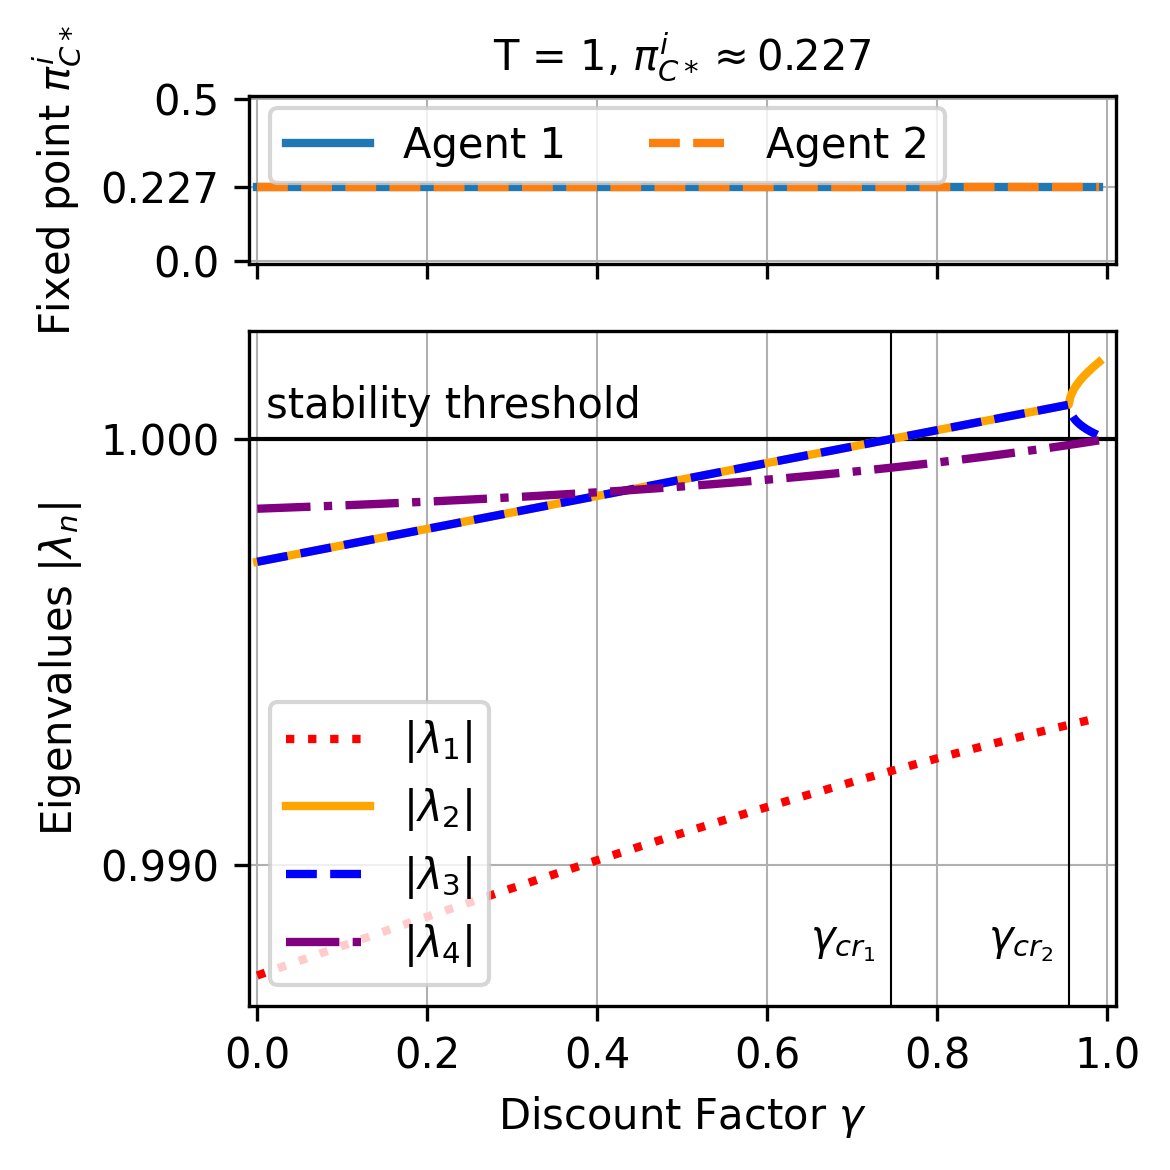

In [ ]:
# plotting settings
directory_for_figures = 'PaperFigures' # directory for saving the figures
if not os.path.exists(directory_for_figures):
    os.makedirs(directory_for_figures)
height_ratios = [1, 4]
linestyle_array = [':', '-', '--', '-.']
dpi = 300

# learning parameters
temperature = 1
learning_rate = 0.01
# calculate the eigenvalues and eigenvectors for a range of discount factors
discount_factor_array = np.linspace(0., 0.99, 1000)
# calculate the fixed point policy and target Q-values for different discount factors
fixed_point_policy_array = []
# store eigenvalues, their absolute values and eigenvectors for each discount factor
eigenvalues_array = []
eigenvalues_betrag_array = []
eigenvectors_array = []

# calculate the eigenvalues and eigenvectors for each discount factor
for discount_factor in discount_factor_array:
    fixed_point_policy = calculate_fixed_point_policy(temperature, discount_factor, print_solution = False)
    eigenvalues, eigenvectors = calculate_eigenvalues_and_eigenvectors(discount_factor, temperature, learning_rate, print_solution = False)
    eigenvalues_betrag = np.abs(eigenvalues)

    # Store the results
    fixed_point_policy_array.append(fixed_point_policy)
    eigenvalues_array.append(eigenvalues)
    eigenvalues_betrag_array.append(eigenvalues_betrag)
    eigenvectors_array.append(eigenvectors)

def plot_eigenvalues_vs_discount_factor_for_T_1(eigenvalues_betrag_array, discount_factor_array, temperature):
    # cosmetics
    fontsize = None
    fig, ax = plt.subplots(2, 1, figsize=(4, 4), dpi=dpi, sharex=True, gridspec_kw={'height_ratios': height_ratios})

    # Plot the fixed point policy
    ax[0].plot(discount_factor_array, fixed_point_policy_array, label="Agent 1", linewidth=2)
    ax[0].plot(discount_factor_array, fixed_point_policy_array, label="Agent 2", linewidth=2, linestyle="--")
    ax[0].set_ylabel('Fixed point $\pi^i_{C*}$')
    ax[0].set_ylim(-0.01, 0.51)
    # # Set custom y-ticks and labels
    ax[0].set_yticks([0.0, 0.227, 0.5])
    ax[0].set_yticklabels(['0.0', '0.227', '0.5'])
    # customize the position of the legend
    ax[0].legend(ncol=2, bbox_to_anchor=(0., 1.05), loc='upper left')
    ax[0].grid(linewidth=0.5)

    color_array = ['red', 'orange', 'blue', 'purple']
    # plot horizontal line at y = 1 for the whole x-axis
    ax[1].axhline(y=1, color='black', linestyle='-', linewidth=1)
    # Plot the absolute values of the eigenvalues
    for i in range(len(eigenvalues_betrag_array[0])):
        ax[1].plot(discount_factor_array, [eigenvalues_betrag[i] for eigenvalues_betrag in eigenvalues_betrag_array], label=f"|$\lambda_{i+1}$|", linestyle=linestyle_array[i], color=color_array[i], linewidth=2, zorder=5)
    # Plot vertical line at x = 0.745676 and x = 0.954936228028
    ax[1].axvline(x=0.745676, color='black', linestyle='-', linewidth = 0.5, alpha= 1)
    ax[1].axvline(x=0.954936228028, color='black', linestyle='-', linewidth = 0.5, alpha= 1)
    # plot the labels of the axvlines directly on the line instead of the legend
    ax[1].text(0.65, 0.988, r'$\gamma_{cr_1}$', rotation=0) # coordinates are (x, y) in data coordinates
    ax[1].text(0.86, 0.988, r'$\gamma_{cr_2}$', rotation=0) # coordinates are (x, y) in data coordinates
    ax[1].text(0.01, 1.0005, 'stability threshold', rotation=0) # coordinates are (x, y) in data coordinates
    # Set axis labels
    ax[1].set_xlabel(f"Discount Factor $\gamma$", fontsize=fontsize)
    ax[1].set_ylabel("Eigenvalues $|\lambda_n|$", fontsize=fontsize)
    ax[1].grid(linewidth=0.5)
    # Plot legend in box outside of plot
    ax[1].legend(loc='lower left', fontsize=fontsize, ncol=1)
    # Set ticks of label to fontsize
    ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
    # Plot only 3 y ticks, otherwise it is too crowded
    ax[1].locator_params(axis='y', nbins=3)
    # limit the ticks on the y-axis to :.3f format for the eigenvalues
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    x_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.]
    x_tick_labels = ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']
    ax[1].set_xticks(x_ticks)
    ax[1].set_xticklabels(x_tick_labels)
    ax[1].set_xlim(-0.01, 1.01)

    # title
    ax[0].set_title(f'T = {temperature}, '+r'$\pi^i_{C*} \approx $'+f'{fixed_point_policy:.3f}', fontsize=fontsize)

    # save the figure
    plt.tight_layout()
    plt.savefig(os.path.join(directory_for_figures, f'Fig4_PD_DetModel_new_StabilityAnalysis_T_{temperature}.pdf'), dpi=dpi)
    plt.show()

# show the bifurcation by plotting the absolute values of the eigenvalues against the discount factor
plot_eigenvalues_vs_discount_factor_for_T_1(eigenvalues_betrag_array, discount_factor_array, temperature)


Temperature = 0.3

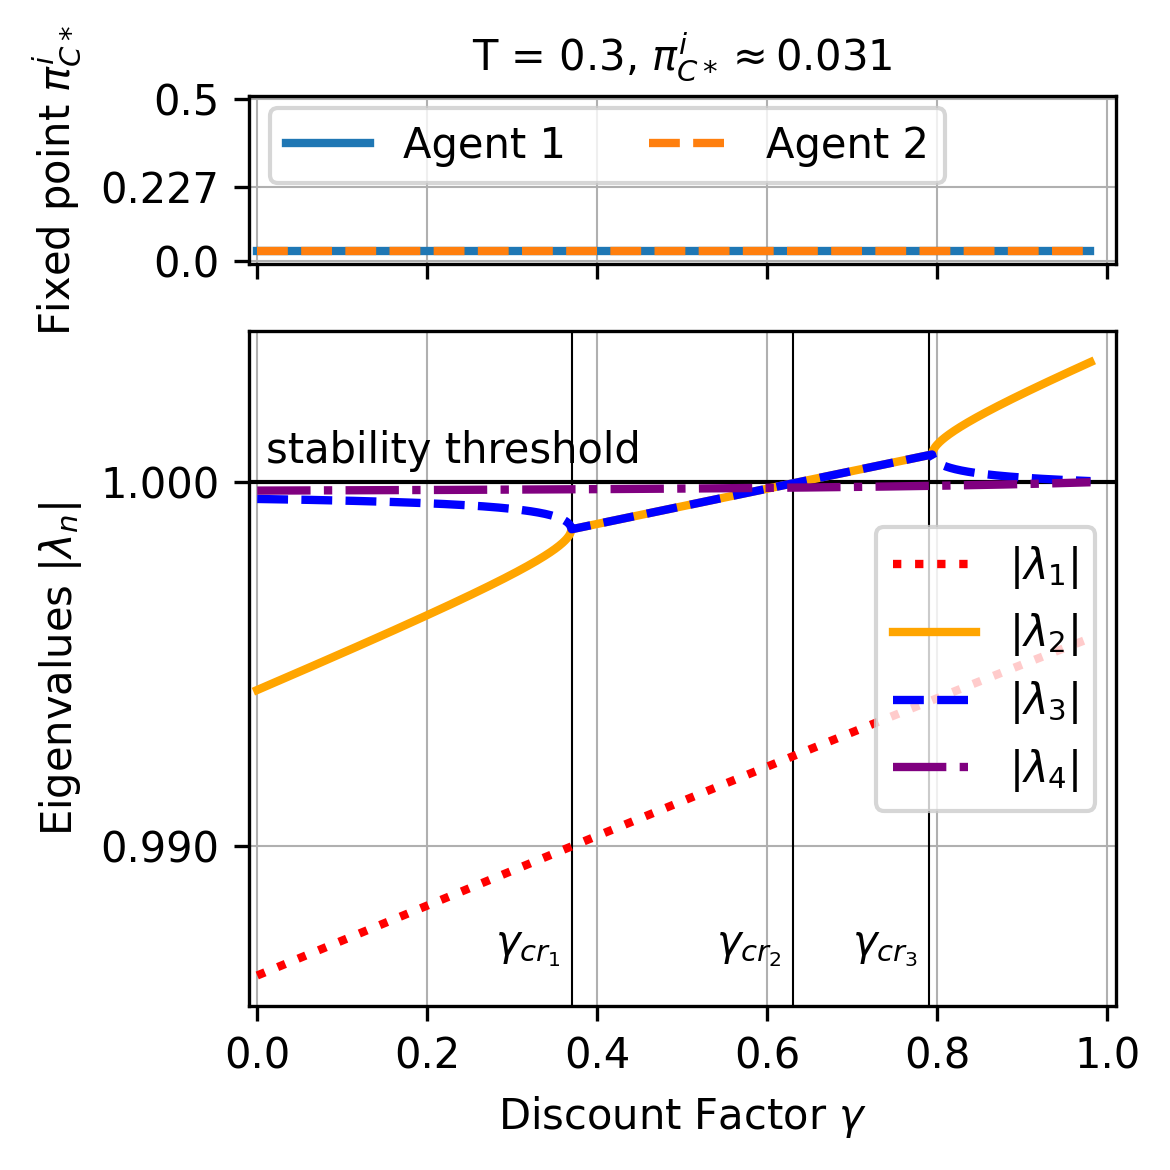

In [ ]:
# set the temperature 
temperature = 0.3

# calculate the eigenvalues and eigenvectors for a range of discount factors
discount_factor_array = np.linspace(0., 0.98, 1000)
# calculate the fixed point policy and target Q-values for different discount factors
fixed_point_policy_array = []
# store eigenvalues, their absolute values and eigenvectors for each discount factor
eigenvalues_array = []
eigenvalues_betrag_array = []
eigenvectors_array = []

# calculate the eigenvalues and eigenvectors for each discount factor
for discount_factor in discount_factor_array:
    fixed_point_policy = calculate_fixed_point_policy(temperature, discount_factor, print_solution = False)
    eigenvalues, eigenvectors = calculate_eigenvalues_and_eigenvectors(discount_factor, temperature, learning_rate, print_solution = False)
    eigenvalues_betrag = np.abs(eigenvalues)

    # Store the results
    fixed_point_policy_array.append(fixed_point_policy)
    eigenvalues_array.append(eigenvalues)
    eigenvalues_betrag_array.append(eigenvalues_betrag)
    eigenvectors_array.append(eigenvectors)

def plot_eigenvalues_vs_discount_factor_for_T_03(eigenvalues_betrag_array, discount_factor_array, temperature):
    # cosmetics
    fontsize = None
    fig, ax = plt.subplots(2, 1, figsize=(4, 4), dpi=dpi, sharex=True, gridspec_kw={'height_ratios': height_ratios})

    # Plot the fixed point policy
    ax[0].plot(discount_factor_array, fixed_point_policy_array, label="Agent 1", linewidth=2)
    ax[0].plot(discount_factor_array, fixed_point_policy_array, label="Agent 2", linewidth=2, linestyle="--")
    ax[0].set_ylabel('Fixed point $\pi^i_{C*}$')
    ax[0].set_ylim(-0.01, 0.51)
    # # Set custom y-ticks and labels
    ax[0].set_yticks([0.0, 0.227, 0.5])
    ax[0].set_yticklabels(['0.0', '0.227', '0.5'])
    # customize the position of the legend
    ax[0].legend(ncol=2, bbox_to_anchor=(0., 1.05), loc='upper left')
    ax[0].grid(linewidth=0.5)

    color_array = ['red', 'orange', 'blue', 'purple']
    # plot horizontal line at y = 1 for the whole x-axis
    ax[1].axhline(y=1, color='black', linestyle='-', linewidth=1)
    # Plot the absolute values of the eigenvalues
    for i in range(len(eigenvalues_betrag_array[0])):
        ax[1].plot(discount_factor_array, [eigenvalues_betrag[i] for eigenvalues_betrag in eigenvalues_betrag_array], label=f"|$\lambda_{i+1}$|", linestyle=linestyle_array[i], color=color_array[i], linewidth=2, zorder=5)

    # Plot vertical line 
    ax[1].axvline(x=0.37, color='black', linestyle='-', linewidth=.5)
    ax[1].axvline(x=0.63, color='black', linestyle='-', linewidth=.5)
    ax[1].axvline(x=0.79, color='black', linestyle='-', linewidth=.5)
    # plot the labels of the axvlines directly on the line instead of the legend
    ax[1].text(0.28, 0.987, r'$\gamma_{cr_1}$', rotation=0) # coordinates are (x, y) in data coordinates
    ax[1].text(0.54, 0.987, r'$\gamma_{cr_2}$', rotation=0) # coordinates are (x, y) in data coordinates
    ax[1].text(0.7, 0.987, r'$\gamma_{cr_3}$', rotation=0) # coordinates are (x, y) in data coordinates
    # stability threshold
    ax[1].text(0.01, 1.0005, 'stability threshold', rotation=0) # coordinates are (x, y) in data coordinates
    # Set axis labels
    ax[1].set_xlabel(f"Discount Factor $\gamma$", fontsize=fontsize)
    ax[1].set_ylabel("Eigenvalues $|\lambda_n|$", fontsize=fontsize)
    ax[1].grid(linewidth=0.5)
    # Plot legend in box outside of plot
    ax[1].legend(loc='center right', fontsize=fontsize, ncol=1)
    # Set ticks of label to fontsize
    ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
    # Plot only 3 y ticks, otherwise it is too crowded
    ax[1].locator_params(axis='y', nbins=3)
    # limit the ticks on the y-axis to :.3f format for the eigenvalues
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    x_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.]
    x_tick_labels = ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']
    ax[1].set_xticks(x_ticks)
    ax[1].set_xticklabels(x_tick_labels)
    ax[1].set_xlim(-0.01, 1.01)

    # title
    ax[0].set_title(f'T = {temperature}, '+r'$\pi^i_{C*} \approx $'+f'{fixed_point_policy:.3f}', fontsize=fontsize)

    # save the figure
    plt.tight_layout()
    plt.savefig(os.path.join(directory_for_figures, f'Fig4_PD_DetModel_new_StabilityAnalysis_T_{temperature}.pdf'), dpi=dpi)
    plt.show()

# show the bifurcation by plotting the absolute values of the eigenvalues
plot_eigenvalues_vs_discount_factor_for_T_03(eigenvalues_betrag_array, discount_factor_array, temperature)

Temperature = 10

Due to an artefact of the numpy.linalg.eig method, the second and the fourth eigenvalue are swapped in the eigenvalues_array and eigenvalues_betrag_array. To undo this sorting, we swap the second and the fourth eigenvalue for all discount factors up until the 155th entry in the arrays manually.

Absolute eigenvalues for gamma = 0.15360360360360362 
 [0.99472671 0.9959095  0.99550618 0.99550618]
Absolute eigenvalues for gamma = 0.1545945945945946
 [0.99472905 0.99550883 0.99550883 0.99591247]

Eigenvalues for gamma = 0.15360360360360362
 [0.99472671+0.j         0.9959095 +0.j         0.99550601+0.00057246j
 0.99550601-0.00057246j]
Eigenvalues for gamma = 0.1545945945945946
 [0.99472905+0.j         0.99550867+0.00057233j 0.99550867-0.00057233j
 0.99591247+0.j        ]


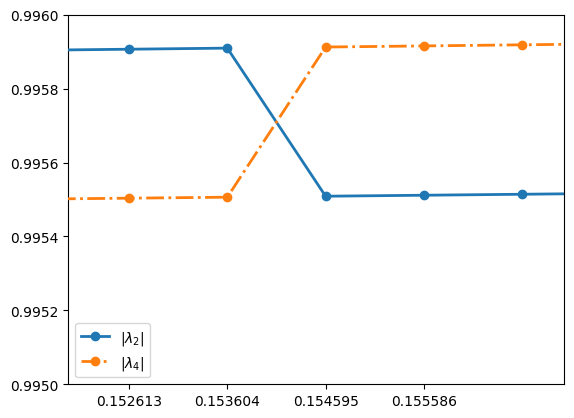

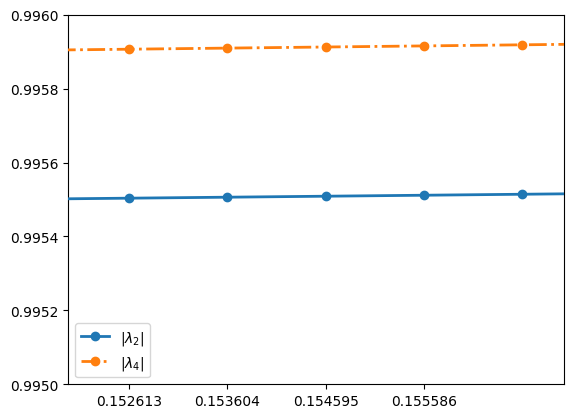

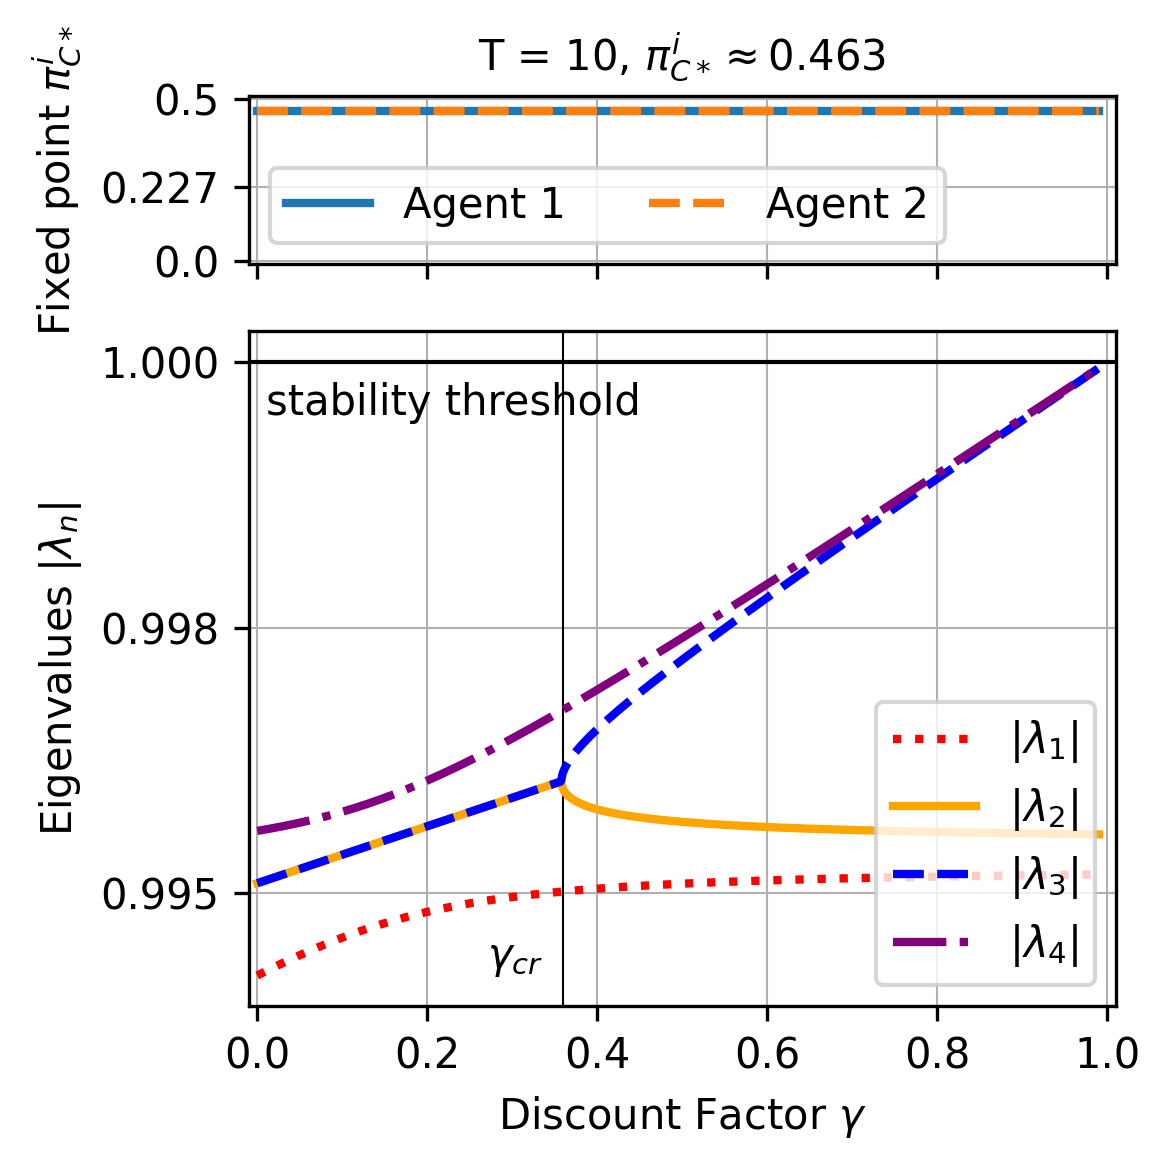

In [ ]:
# set the temperature 
temperature = 10

# calculate the eigenvalues and eigenvectors for a range of discount factors
discount_factor_array = np.linspace(0., 0.99, 1000)
# calculate the fixed point policy and target Q-values for different discount factors
fixed_point_policy_array = []
# store eigenvalues, their absolute values and eigenvectors for each discount factor
eigenvalues_array = []
eigenvalues_betrag_array = []
eigenvectors_array = []
# calculate the eigenvalues and eigenvectors for each discount factor
for discount_factor in discount_factor_array:
    fixed_point_policy = calculate_fixed_point_policy(temperature, discount_factor, print_solution = False)
    eigenvalues, eigenvectors = calculate_eigenvalues_and_eigenvectors(discount_factor, temperature, learning_rate, print_solution = False)
    eigenvalues_betrag = np.abs(eigenvalues)

    # Store the results
    fixed_point_policy_array.append(fixed_point_policy)
    eigenvalues_array.append(eigenvalues)
    eigenvalues_betrag_array.append(eigenvalues_betrag)
    eigenvectors_array.append(eigenvectors)

def plot_eigenvalues_vs_discount_factor_for_T_10(eigenvalues_betrag_array, discount_factor_array, temperature):
    # cosmetics
    fontsize = None
    fig, ax = plt.subplots(2, 1, figsize=(4, 4), dpi=dpi, sharex=True, gridspec_kw={'height_ratios': height_ratios})

    # Plot the fixed point policy
    ax[0].plot(discount_factor_array, fixed_point_policy_array, label="Agent 1", linewidth=2)
    ax[0].plot(discount_factor_array, fixed_point_policy_array, label="Agent 2", linewidth=2, linestyle="--")
    ax[0].set_ylabel('Fixed point $\pi^i_{C*}$')
    ax[0].set_ylim(-0.01, 0.51)
    # # Set custom y-ticks and labels
    ax[0].set_yticks([0.0, 0.227, 0.5])
    ax[0].set_yticklabels(['0.0', '0.227', '0.5'])
    # customize the position of the legend
    ax[0].legend(ncol=2, loc='lower left')
    ax[0].grid(linewidth=0.5)

    color_array = ['red', 'orange', 'blue', 'purple']
    # plot horizontal line at y = 1 for the whole x-axis
    ax[1].axhline(y=1, color='black', linestyle='-', linewidth=1)
    # Plot the absolute values of the eigenvalues
    for i in range(len(eigenvalues_betrag_array[0])):
        ax[1].plot(discount_factor_array, [eigenvalues_betrag[i] for eigenvalues_betrag in eigenvalues_betrag_array], label=f"|$\lambda_{i+1}$|", linestyle=linestyle_array[i], color=color_array[i], linewidth=2, zorder=5)
    # Plot vertical line
    ax[1].axvline(x=0.36, color='black', linestyle='-', linewidth=.5)
    # plot the labels directly on the line instead of the legend
    ax[1].text(0.27, 0.9943, r'$\gamma_{cr}$', rotation=0) # coordinates are (x, y) in data coordinates
    # plot text stability threshold
    ax[1].text(0.01, 0.9995, 'stability threshold', rotation=0) # coordinates are (x, y) in data coordinates

    ax[1].set_xlabel(f"Discount Factor $\gamma$", fontsize=fontsize)
    ax[1].set_ylabel("Eigenvalues $|\lambda_n|$", fontsize=fontsize)
    ax[1].grid(linewidth=0.5)
    # Plot legend 
    ax[1].legend(loc='lower right', fontsize=fontsize, ncol=1)
    # Set ticks of label to fontsize
    ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
    # limit the ticks on the y-axis to :.3f format for the eigenvalues
    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    # Plot only 3 y ticks, otherwise it is too crowded
    ax[1].locator_params(axis='y', nbins=3)
    x_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.]
    x_tick_labels = ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']
    ax[1].set_xticks(x_ticks)
    ax[1].set_xticklabels(x_tick_labels)
    ax[1].set_xlim(-0.01, 1.01)

    # title
    ax[0].set_title(f'T = {temperature}, '+r'$\pi^i_{C*} \approx $'+f'{fixed_point_policy:.3f}', fontsize=fontsize)

    # save the figure
    plt.tight_layout()
    plt.savefig(os.path.join(directory_for_figures, f'Fig4_PD_DetModel_new_StabilityAnalysis_T_{temperature}.pdf'), dpi=dpi)
    plt.show()

# ----------- Adjust the order of the eigenvalues to ensure continuity of the bifurcation diagram ------------
# Due to an artefact of the numpy.linalg.eig method, the second and the fourth eigenvalue are swapped in the eigenvalues_array and eigenvalues_betrag_array for T=10. To undo this sorting, we swap the second and the fourth eigenvalue for all discount factors up until the 155th entry in the arrays manually.
if True:
    print("Due to an artefact of the numpy.linalg.eig method, the second and the fourth eigenvalue are swapped in the eigenvalues_array and eigenvalues_betrag_array. To undo this sorting, we swap the second and the fourth eigenvalue for all discount factors up until the 155th entry in the arrays manually.")
    print()
    print(f"Absolute eigenvalues for gamma = {discount_factor_array[155]} \n", eigenvalues_betrag_array[155])
    print(f"Absolute eigenvalues for gamma = {discount_factor_array[156]}\n", eigenvalues_betrag_array[156])
    print()
    print(f"Eigenvalues for gamma = {discount_factor_array[155]}\n" ,eigenvalues_array[155])
    print(f"Eigenvalues for gamma = {discount_factor_array[156]}\n", eigenvalues_array[156])

    # plot only the second and the fourth eigenvalue against the discount factor
    plt.plot(discount_factor_array, [eigenvalues_betrag[1] for eigenvalues_betrag in eigenvalues_betrag_array], label=f"|$\lambda_2$|", linestyle=linestyle_array[1], linewidth=2, zorder=5, marker='o')
    plt.plot(discount_factor_array, [eigenvalues_betrag[3] for eigenvalues_betrag in eigenvalues_betrag_array], label=f"|$\lambda_4$|", linestyle=linestyle_array[3], linewidth=2, zorder=5, marker='o')
    plt.legend()
    plt.xticks(discount_factor_array[154:158])
    plt.xlim(0.152, 0.157)
    plt.ylim(0.995, 0.996)
    plt.show()

    # swap the order of the second and the fourth eigenvalue in eigenvalues_array and eigenvalues_betrag_array for all discount factors up until eigenvalues_array[156] and eigenvalues_betrag_array[156]
    for i in range(156):
        eigenvalues_array[i][1], eigenvalues_array[i][3] = eigenvalues_array[i][3], eigenvalues_array[i][1]
        eigenvalues_betrag_array[i][1], eigenvalues_betrag_array[i][3] = eigenvalues_betrag_array[i][3], eigenvalues_betrag_array[i][1]

    # plot only the second and the fourth eigenvalue against the discount factor
    plt.plot(discount_factor_array, [eigenvalues_betrag[1] for eigenvalues_betrag in eigenvalues_betrag_array], label=f"|$\lambda_2$|", linestyle=linestyle_array[1], linewidth=2, zorder=5, marker='o')
    plt.plot(discount_factor_array, [eigenvalues_betrag[3] for eigenvalues_betrag in eigenvalues_betrag_array], label=f"|$\lambda_4$|", linestyle=linestyle_array[3], linewidth=2, zorder=5, marker='o')
    plt.legend()
    plt.xticks(discount_factor_array[154:158])
    plt.xlim(0.152, 0.157)
    plt.ylim(0.995, 0.996)
    plt.show()

# show the bifurcation by plotting the absolute values of the eigenvalues
plot_eigenvalues_vs_discount_factor_for_T_10(eigenvalues_betrag_array, discount_factor_array, temperature)